**Pycaret trial**


Based on the blog article - https://analyticsindiamag.com/how-to-visualize-different-ml-models-using-pycaret-for-optimization/



*Classification Model*

In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from pycaret.datasets import get_data
import pycaret
from pycaret.classification import *
from pycaret.regression import *
from pycaret.clustering import *
from pycaret.anomaly import *

In [4]:
classification_data = get_data('heart_disease')

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [7]:
classification_model = pycaret.classification.setup(data = classification_data, target = 'Disease')

,Description,Value
0,Session id,6540
1,Target,Disease
2,Target type,Binary
3,Original data shape,"(270, 14)"
4,Transformed data shape,"(270, 14)"
5,Transformed train set shape,"(189, 14)"
6,Transformed test set shape,"(81, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [9]:
random_forest = pycaret.classification.create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.9545,0.8750,1.0000,0.9333,0.8902,0.8956
1,0.6842,0.8466,0.6250,0.6250,0.6250,0.3523,0.3523
2,0.8947,0.9205,0.8750,0.8750,0.8750,0.7841,0.7841
3,0.6316,0.6364,0.5000,0.5714,0.5333,0.2312,0.2326
4,0.8421,0.9545,0.6250,1.0000,0.7692,0.6587,0.7008
5,0.9474,0.9611,0.8889,1.0000,0.9412,0.8939,0.8989
6,0.7368,0.8611,0.7778,0.7000,0.7368,0.4751,0.4778
7,0.8421,0.9222,0.6667,1.0000,0.8000,0.6780,0.7161
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

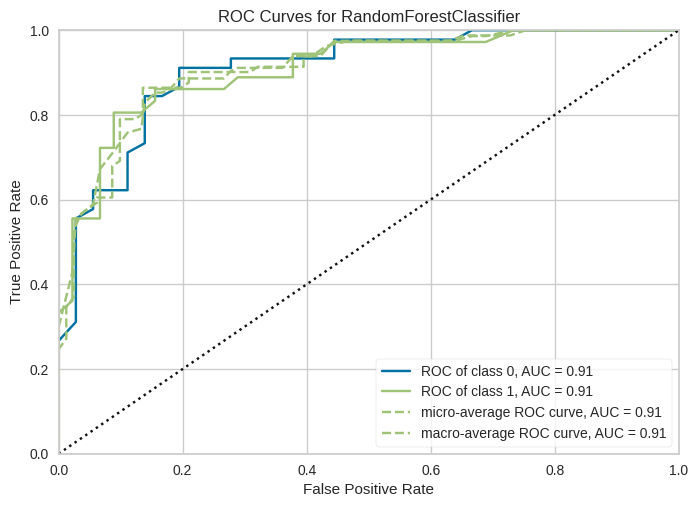

In [10]:
pycaret.classification.plot_model(random_forest, plot = 'auc')

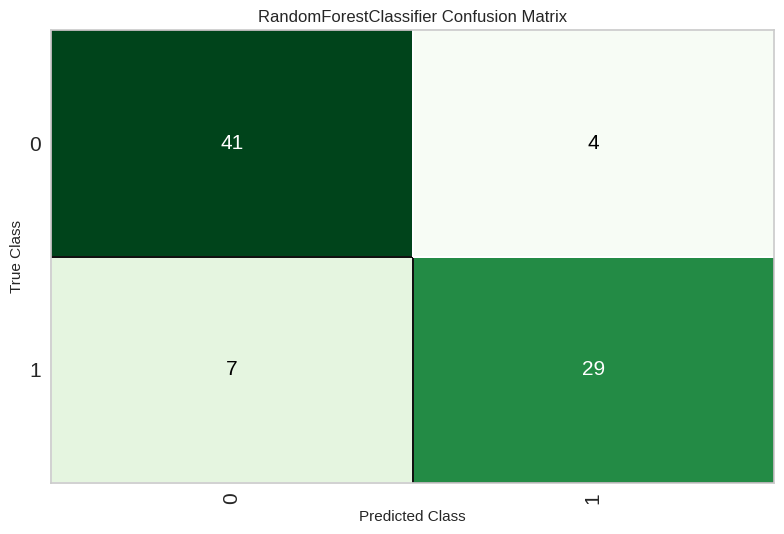

In [11]:
pycaret.classification.plot_model(random_forest, plot = 'confusion_matrix')

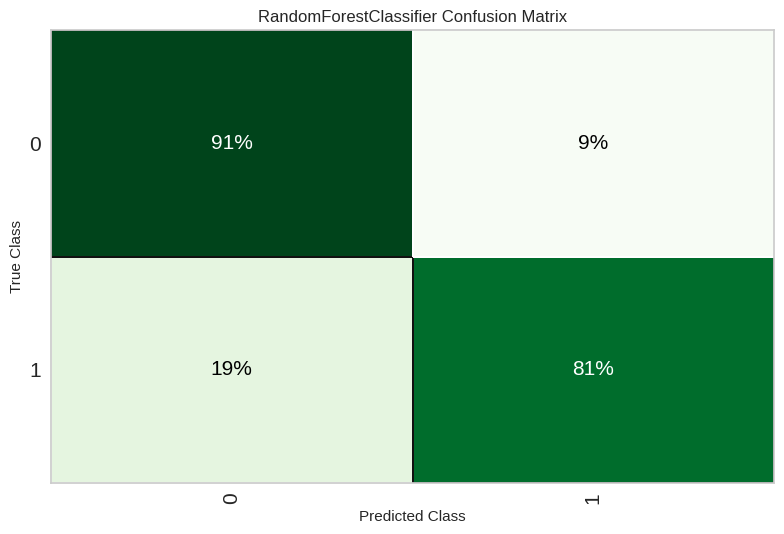

In [12]:
pycaret.classification.plot_model(random_forest, plot = 'confusion_matrix', plot_kwargs = {'percent':True})

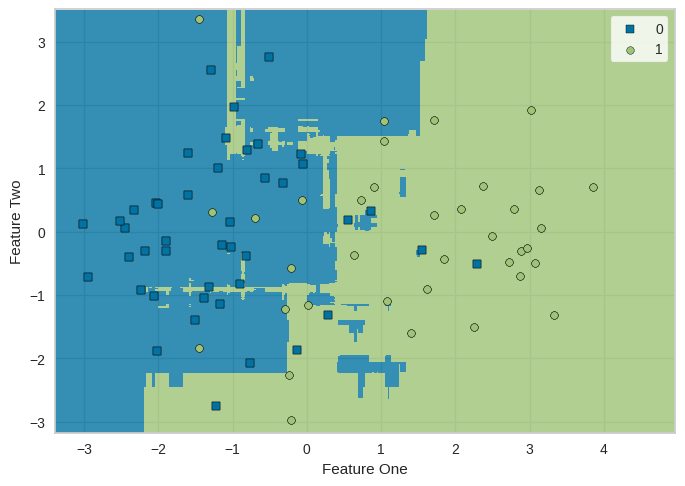

In [13]:
pycaret.classification.plot_model(random_forest, plot = 'boundary', use_train_data = True)

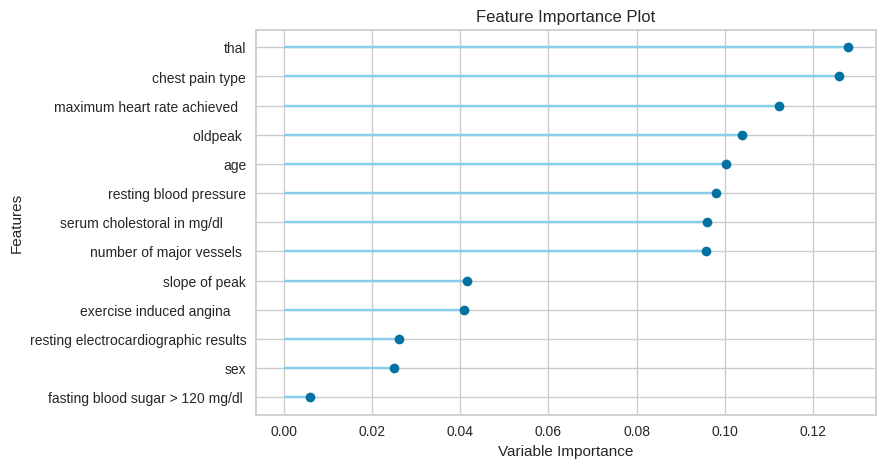

In [14]:
pycaret.classification.plot_model(random_forest, plot = 'feature_all', use_train_data=True)

*Regression Model*

In [15]:
regression_data = get_data('automobile')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [16]:
regression_model = pycaret.regression.setup(data = regression_data, target = 'price')

,Description,Value
0,Session id,1673
1,Target,price
2,Target type,Regression
3,Original data shape,"(202, 26)"
4,Transformed data shape,"(202, 87)"
5,Transformed train set shape,"(141, 87)"
6,Transformed test set shape,"(61, 87)"
7,Ordinal features,3
8,Numeric features,11
9,Categorical features,14


In [17]:
rfr = pycaret.regression.create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2898.3842,18815077.7245,4337.6350,0.6129,0.2766,0.2213
1,3179.8601,23443857.3506,4841.8857,0.6593,0.2645,0.1812
2,2442.4480,22710942.8065,4765.5999,0.6042,0.2135,0.1254
3,2053.1902,7312891.6785,2704.2359,0.7370,0.2062,0.1563
4,1370.5492,3681243.0497,1918.6566,0.7421,0.1468,0.1140
5,1904.9608,8721297.4949,2953.1843,0.9053,0.1725,0.1232
6,1271.6993,4098084.6279,2024.3727,0.9330,0.1846,0.1211
7,1613.9460,4022587.5599,2005.6389,0.9431,0.1490,0.1299
8,1186.4059,3811396.9952,1952.2799,0.7894,0.1766,0.1257


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

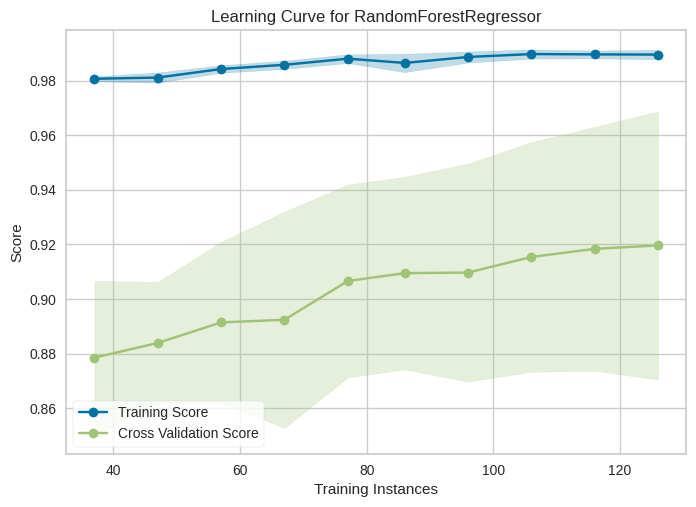

In [18]:
pycaret.regression.plot_model(rfr, plot = 'learning', use_train_data = True)

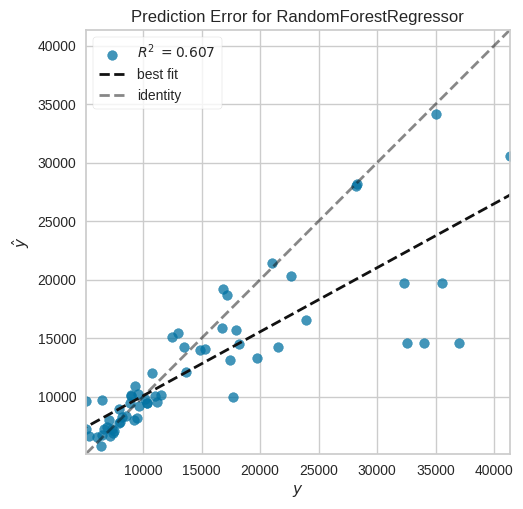

In [19]:
pycaret.regression.plot_model(rfr, plot = 'error', use_train_data = True)

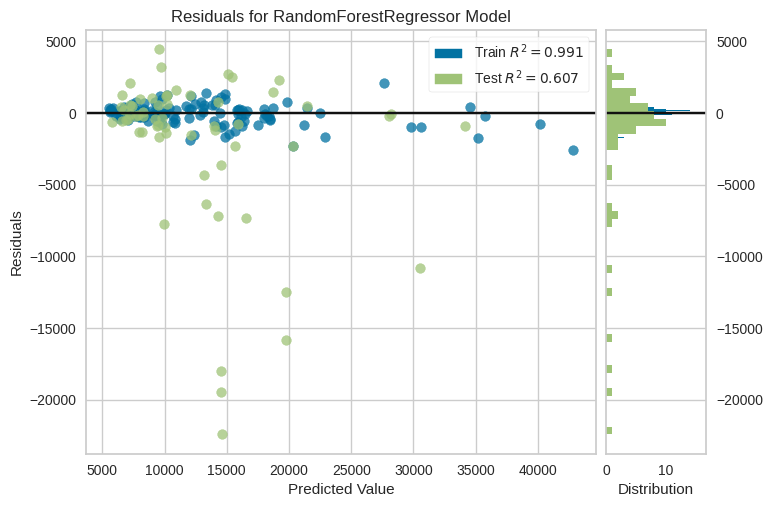

In [20]:
pycaret.regression.plot_model(rfr, plot = 'residuals', use_train_data = True)

*Clustering Model*

In [21]:
clustering_data = get_data('mice')

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [22]:
clustering_model = pycaret.clustering.setup(data = clustering_data, normalize = True, ignore_features = ['MouseID'], session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(1080, 82)"
2,Transformed data shape,"(1080, 88)"
3,Ignore features,1
4,Ordinal features,3
5,Numeric features,77
6,Categorical features,4
7,Rows with missing values,48.9%
8,Preprocess,True
9,Imputation type,simple


In [23]:
kmeans = pycaret.clustering.create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1176,134.1120,2.2134,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [24]:
pycaret.clustering.plot_model(kmeans, plot = 'cluster')

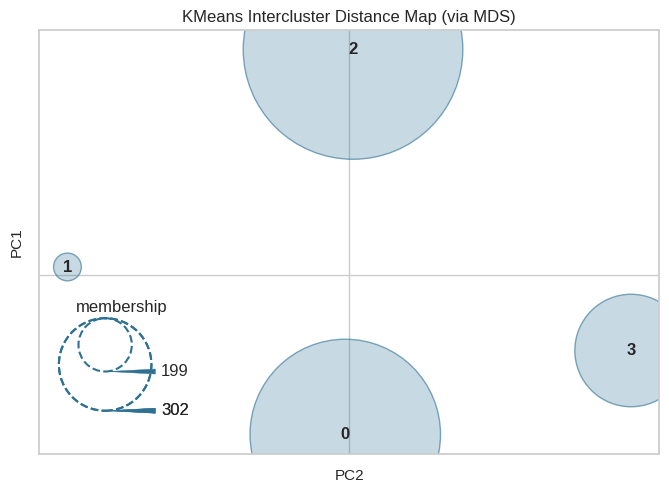

In [25]:
pycaret.clustering.plot_model(kmeans, plot = 'distance')

*Anomaly Models*

In [26]:
anomaly_model = pycaret.anomaly.setup(data = clustering_data, normalize = True, ignore_features = ['MouseID'], session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(1080, 82)"
2,Transformed data shape,"(1080, 88)"
3,Ignore features,1
4,Ordinal features,3
5,Numeric features,77
6,Categorical features,4
7,Rows with missing values,48.9%
8,Preprocess,True
9,Imputation type,simple


In [27]:
iforest = pycaret.anomaly.create_model('iforest')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [28]:
pycaret.anomaly.plot_model(iforest)